# Financial Analysis - Kenyan Stocks

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
#importing stats models to build the trend
import statsmodels.api as sm

In [4]:
#acquiring the data files and storing them in individual dataframes
kcb = pd.read_csv('kcb_prices.csv')
equity = pd.read_csv('eqty_prices.csv')
eabl = pd.read_csv('eabl_prices.csv')

In [5]:
#setting the date column to datetime
kcb["Date"] = pd.to_datetime(kcb["Date"])
equity["Date"] = pd.to_datetime(equity["Date"])
eabl["Date"] = pd.to_datetime(eabl["Date"])

In [6]:
#setting the date column as the index for time series analysis
kcb.set_index('Date', inplace = True)
equity.set_index('Date', inplace = True)
eabl.set_index('Date', inplace = True)

In [7]:
kcb = kcb.sort_index(axis =0 , ascending = True)
eabl = eabl.sort_index(axis =0 , ascending = True)
equity = equity.sort_index(axis =0 , ascending = True)

In [8]:
kcb.columns = ['Open','High',"Low","Close","Volume"]
equity.columns = ['Open','High',"Low","Close","Volume"]
eabl.columns = ['Open','High',"Low","Close","Volume"]

In [9]:
from pandas.plotting import scatter_matrix

In [10]:
assets_comp = pd.concat([kcb['Open'],equity['Open'],eabl['Open']],axis=1)

In [11]:
assets_comp.columns = ['KCB Open','Equity Open' , 'EABL Open']

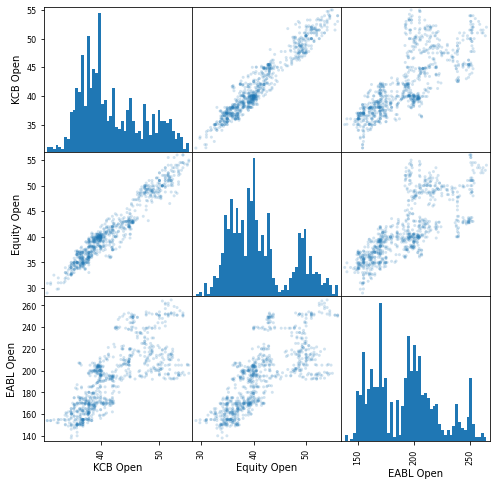

In [12]:
scatter_matrix(assets_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

In [13]:
assets_comp

,KCB Open,Equity Open,EABL Open
Date,,,
2018-01-02,42.75,40.00,238.00
2018-01-03,42.50,40.00,239.00
2018-01-04,42.50,40.00,239.00
2018-01-05,42.75,40.25,240.00
2018-01-08,42.50,40.00,240.00
...,...,...,...
2021-05-31,42.00,43.00,186.25
2021-06-02,43.00,42.50,185.25
2021-06-03,42.30,42.65,186.00


<AxesSubplot:xlabel='Date'>

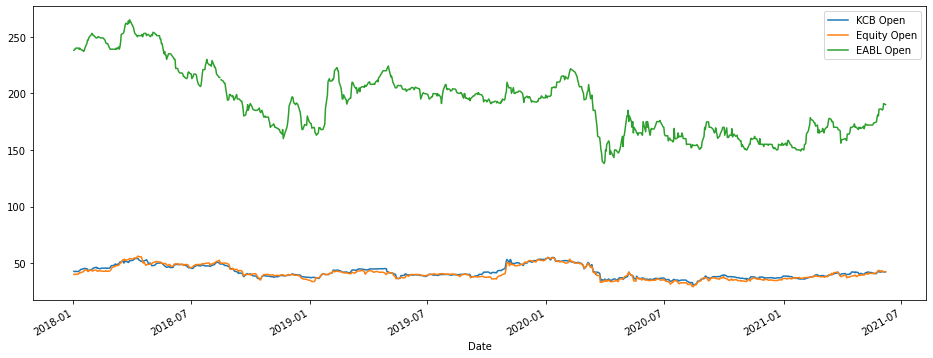

In [14]:
assets_comp[['KCB Open','Equity Open','EABL Open']].plot(figsize=(16,6))


In [15]:
eabl_cycle, eabl_trend = sm.tsa.filters.hpfilter(eabl.Open)
kcb_cycle, kcb_trend = sm.tsa.filters.hpfilter(kcb.Open)
equity_cycle, equity_trend = sm.tsa.filters.hpfilter(equity.Open)

In [16]:
eabl["trend"] = eabl_trend
kcb["trend"] = kcb_trend
equity["trend"] = equity_trend


Text(0.5, 1.0, 'EABL Trend')

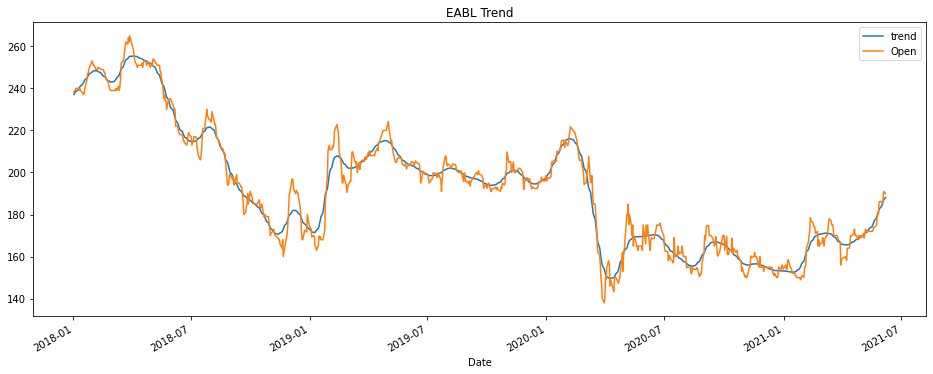

In [21]:
eabl[['trend','Open']].plot(figsize=(16,6))
plt.title("EABL Trend")

Text(0.5, 1.0, 'Equity Trend')

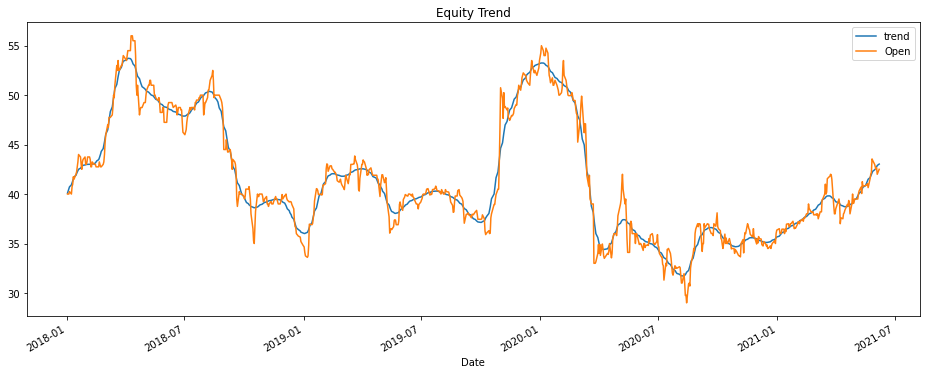

In [22]:
equity[['trend','Open']].plot(figsize=(16,6))
plt.title("Equity Trend")

Text(0.5, 1.0, 'KCB Trend')

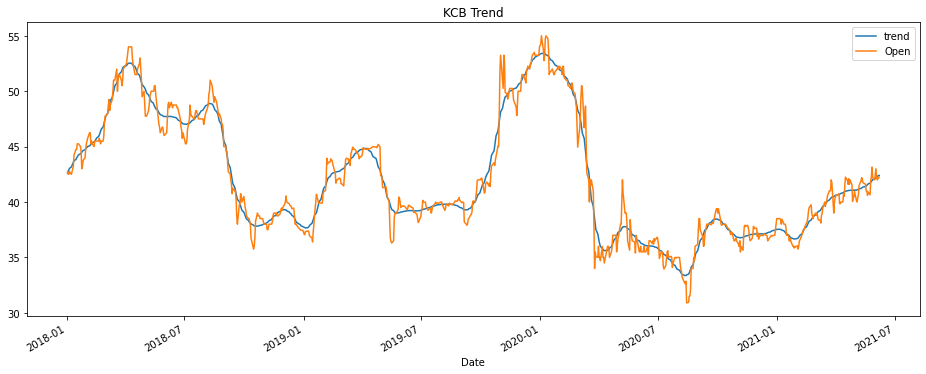

In [23]:
kcb[['trend','Open']].plot(figsize=(16,6))
plt.title("KCB Trend")

Text(0.5, 1.0, 'EABL Price Analysis')

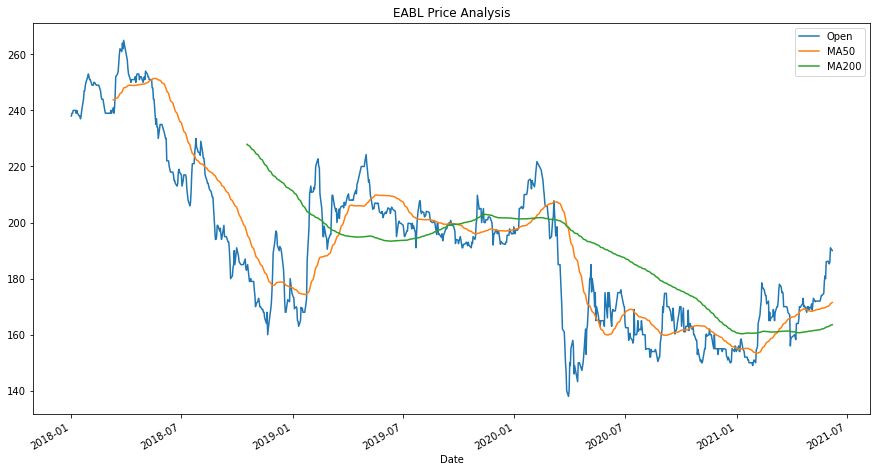

In [24]:
eabl['MA50'] = eabl['Open'].rolling(50).mean()
eabl['MA200'] = eabl['Open'].rolling(200).mean()
eabl['MA10'] = eabl['Open'].rolling(10).mean()


#Close

eabl[["Open","MA50","MA200"]].plot(figsize=(15,8))
plt.title("EABL Price Analysis")

Text(0.5, 1.0, 'Equity Price Analysis')

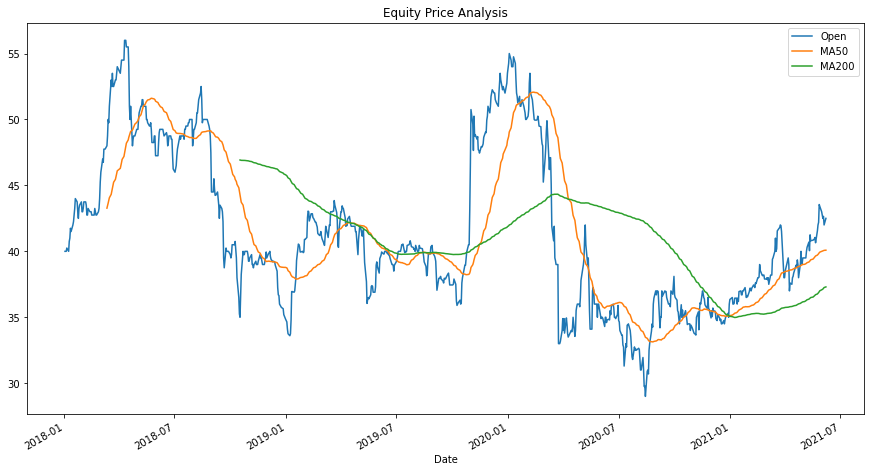

In [25]:
equity['MA50'] = equity['Open'].rolling(50).mean()
equity['MA200'] = equity['Open'].rolling(200).mean()
equity['MA10'] = equity['Open'].rolling(10).mean()


#Close

equity[["Open","MA50","MA200"]].plot(figsize=(15,8))
plt.title("Equity Price Analysis")

Text(0.5, 1.0, 'KCB Price Analysis')

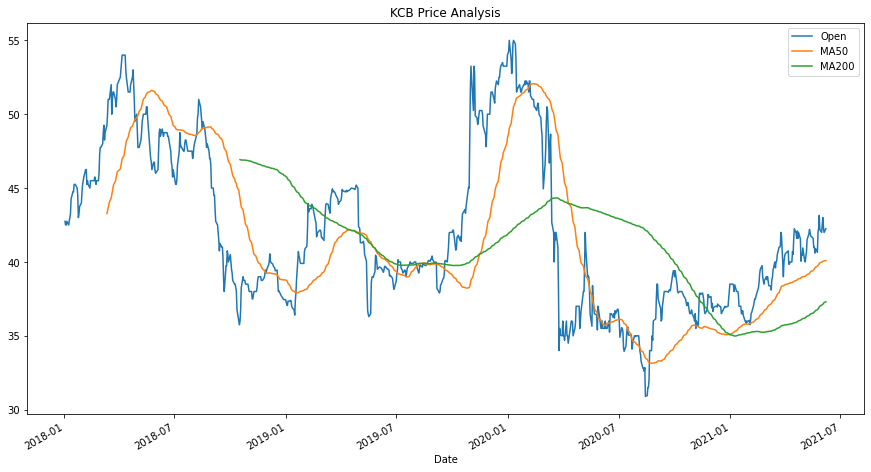

In [26]:
kcb['MA50'] = equity['Open'].rolling(50).mean()
kcb['MA200'] = equity['Open'].rolling(200).mean()
kcb['MA10'] = equity['Open'].rolling(10).mean()


#Close

kcb[["Open","MA50","MA200"]].plot(figsize=(15,8))
plt.title("KCB Price Analysis")